<center><h1 style="font-weight: bold;">
Introduction to WaveSongs </h1>
</div></center>

<a target="_blanlk" href="https://colab.research.google.com/github/wavesongs/wavesongs/blob/main/Tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you are using Google Colab uncomment and execute the following cell

In [1]:
# ! pip install wavesongs

Then, follow the [installation guide](https://github.com/wavesongs/wavesongs#%EF%B8%8F-installation) to set up the evironment and install the required libraries.

## Libraries

Import the required classes and functions from `wavesongs`

In [1]:
# select matplotlib backend, enable interactive plots
%matplotlib ipympl

from wavesongs.utils.paths import ProjDirs       # project files manager
from wavesongs.objects.song import Song          # song objects
from wavesongs.objects.syllable import Syllable  # syllable objects
from wavesongs.utils import plots                # plotter
from wavesongs.utils.tools import get_positions  # data extraction

To use any object, `Syllable` or `Song`, you have to define a `ProjDirs` object to manage the files generated (images, audios, csv, etc). Next, create a `Song` with the project directory and a file name example, in this tutorial we are using the audio located at `./assets/audio/574179401 - Zonotrichia Capensis.wav`.

Once degined the song compute its acoustical features, here you can define the Fast Fourier Transform (FFT) window, fundamental frequency (FF) method, etc.

To display the spectrogram use the module `plots`.

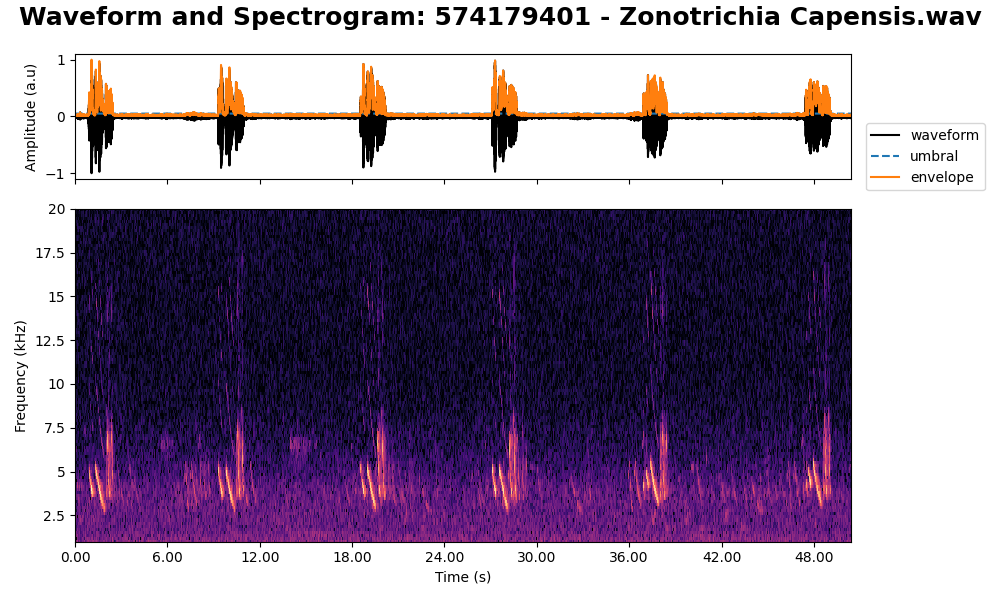

In [ ]:
proj_dirs = ProjDirs()

# dfine the song
copeton_song = Song(proj_dirs, file_id="574179401")
copeton_song.acoustical_features(umbral_FF=1.4, NN=256)

# play the song
copeton_song.play()

# display the song
plots.spectrogram_waveform(copeton_song, save=False)

As you may experience, long audio files will slow down the plot response. As good practice define the song in the region of interest, for exmaple a whole birdsong.  

You can select a time interval with the argument `select_time`, chage its value to `True`. 


Image save at assets/result/imgs/574179401 - Zonotrichia Capensis-Song.png


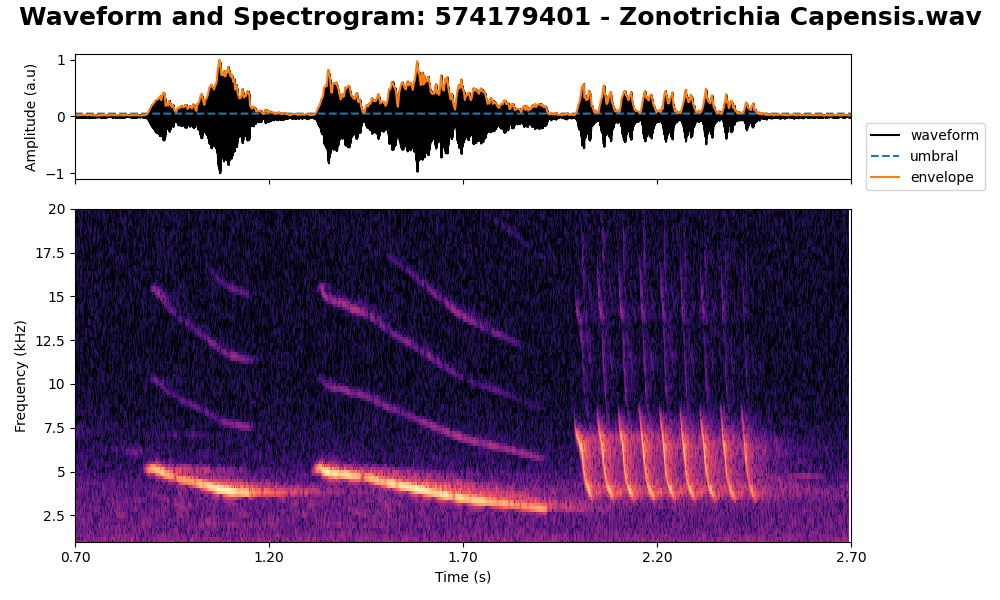

In [14]:
copeton_syllable = Song(proj_dirs, file_id="574179401", tlim=(0.7,2.7))
copeton_syllable.acoustical_features(umbral_FF=1.4, NN=256)

klicker_times = plots.spectrogram_waveform(copeton_syllable, tlim=(0.7,2.7),
                                           select_time=True, show=True, save=True)

This function will return an array of measures, each element is vetor with the time and frequency range values. If you not select anything from the spectrum an error will araise 

In [20]:
data = get_positions(klicker_times)
tlim, flim = data[0] # first pair, index = 0 
t0 = tlim[0] + song_copeton.t0_bs
tend = tlim[1] + song_copeton.t0_bs
print(f"Initial time: {t0:.4f} s. Final time {tend:.4f} s")

Initial time: 0.1829 s. Final time 0.5927 s


Image save at assets/result/imgs/574179401 - Zonotrichia Capensis-0-intro-down


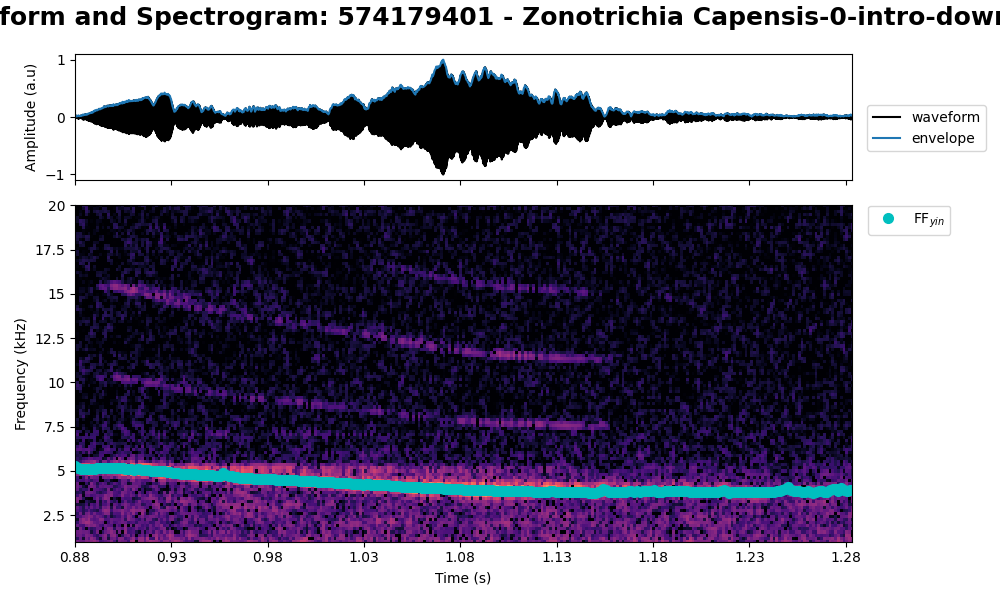

In [28]:
# tlim = (0.1829-song_copeton.t0_bs, 0.5927-song_copeton.t0_bs)
copeton_syllable_0 = Syllable(obj=copeton_syllable, tlim=tlim, type="intro-down", no_syllable="0")
copeton_syllable_0.acoustical_features(NN=256)

plots.spectrogram_waveform(copeton_syllable_0, ff_on=True, save=True)

## Optimal Syllable

Generate the synthetic syllable with the optimizer module

### Optimal Parameters

In [31]:
from wavesongs.model import optimizer

optimal_z = optimizer.optimal_params(syllable=copeton_syllable_0, Ns=20)
print(f"Optimal values found:\n\t{optimal_z}")


Computing a0*...
Optimization terminated successfully.
         Current function value: 0.004181
         Iterations: 2
         Function evaluations: 4
	 Optimal values: a_0=0.0011, t=0.77 min

Computing b0*, b1*, and b2*...
Optimization terminated successfully.
         Current function value: 0.000953
         Iterations: 26
         Function evaluations: 53
	 Optimal values: b_0=-0.2108, b_2=1.2750, t=12.66 min
Optimization terminated successfully.
         Current function value: 0.000954
         Iterations: 10
         Function evaluations: 21
	 Optimal values: b_1=1.0007, t=2.76 min

Time of execution: 16.19 min


{'a0': 0.0010500000000000002,
 'b0': -0.21075622150176632,
 'b1': 1.000657894736842,
 'b2': 1.274992203754511}

### Solution

Image save at assets/result/imgs/synth_574179401 - Zonotrichia Capensis-0-intro-down


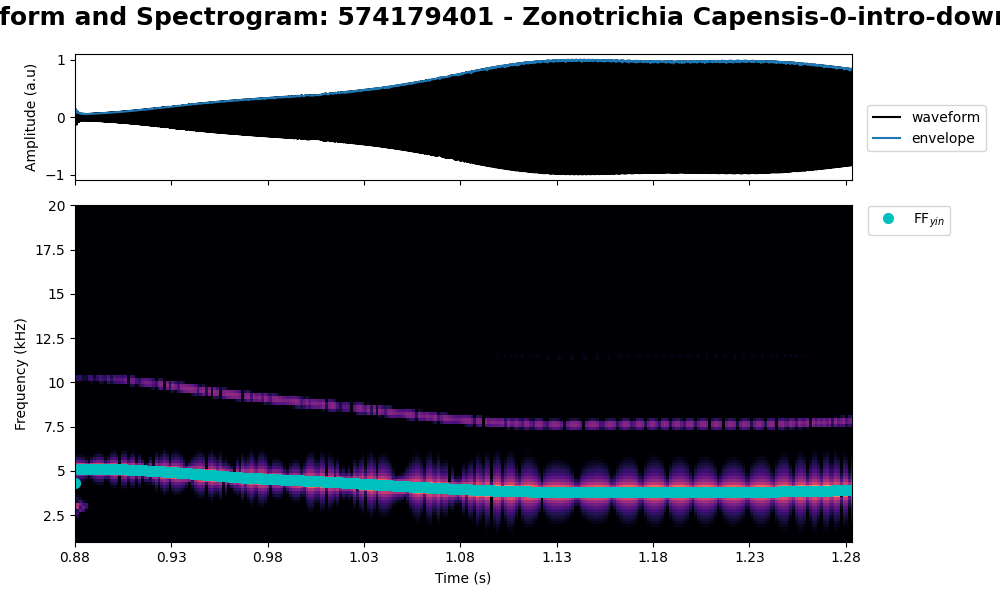

In [38]:
# dfine synthetic syllable
synth_copeton_syllable_0 = copeton_syllable_0.solve(z=optimal_z)

# display syllable
plots.spectrogram_waveform(synth_copeton_syllable_0, ff_on=True, save=True)

Image save at 574179401 - Zonotrichia Capensis-0-intro-down-ScoringVariables.png


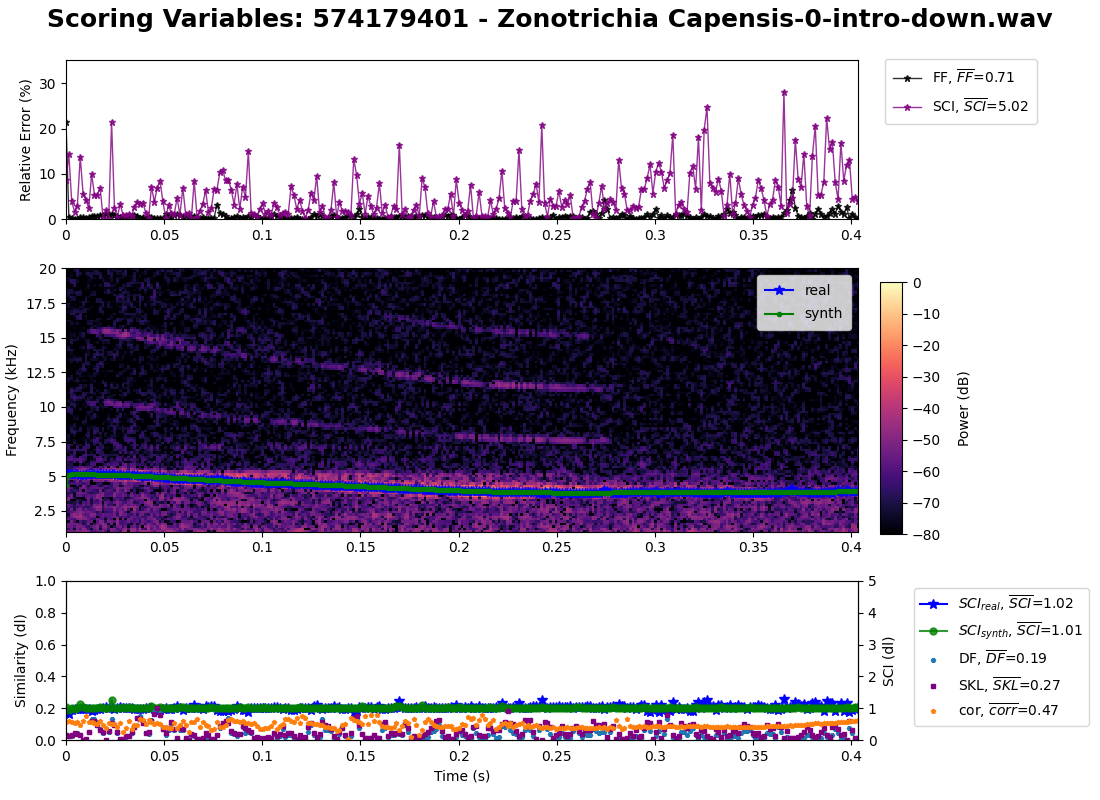

In [35]:
plots.scores(copeton_syllable_0, synth_copeton_syllable_0)

Image save at 574179401 - Zonotrichia Capensis-0-intro-down-SoundAndSpectros.png


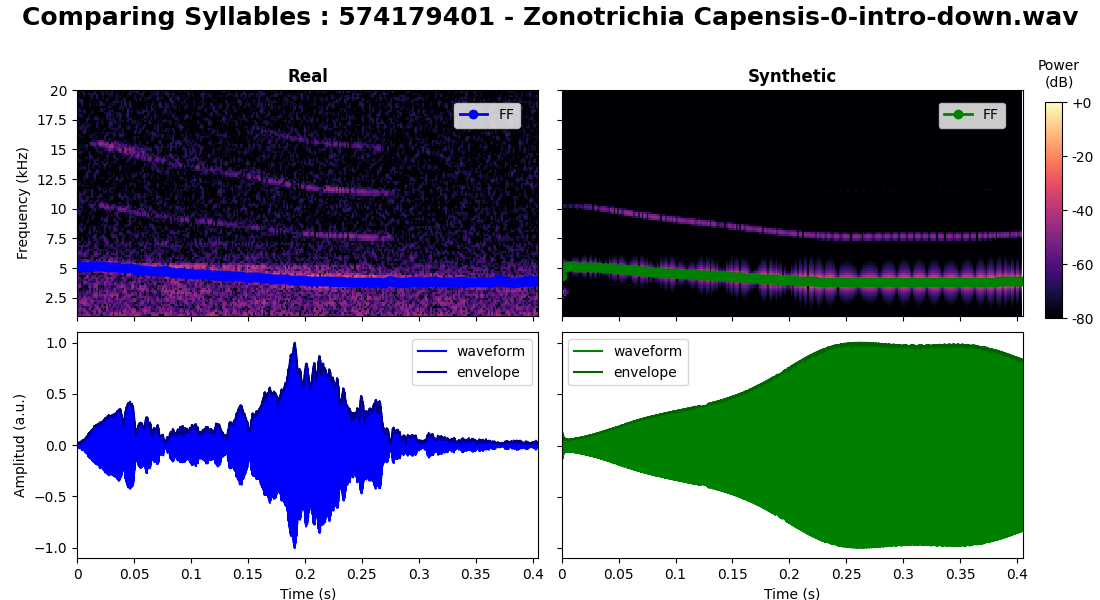

In [36]:
plots.syllables(copeton_syllable_0, synth_copeton_syllable_0, ff_on=True)

Image save at synth_574179401 - Zonotrichia Capensis-0-intro-down-mg_params.png


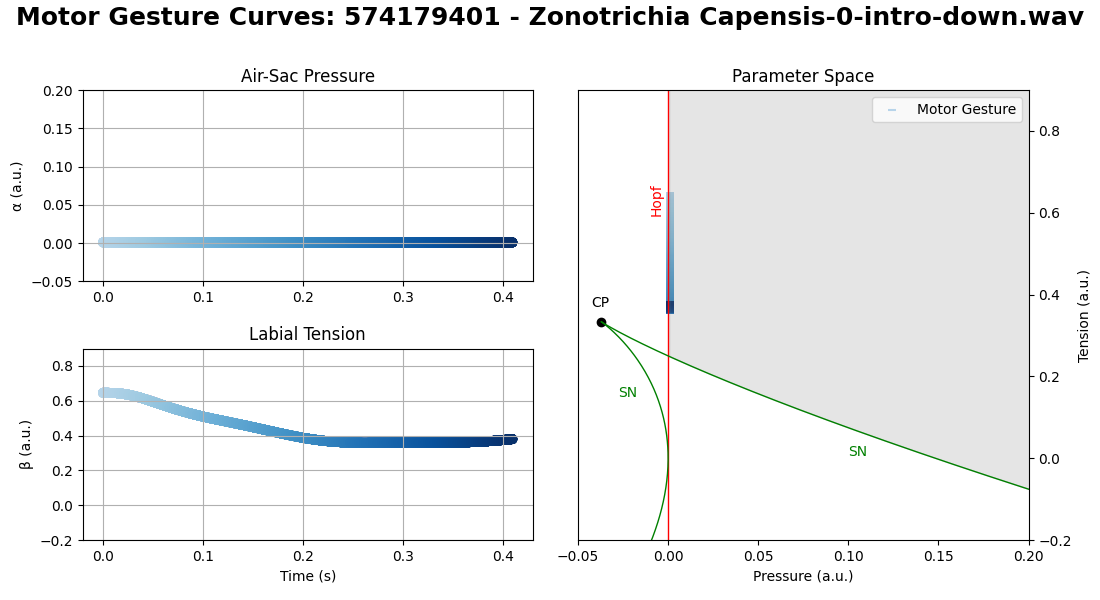

In [37]:
plots.alpha_beta(synth_copeton_syllable_0)